In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

# The extinction class: RedCorr()

The class RedCorr manages the extinction (reddening) correction. It can compute the logarithmic extinction at H$\beta$ by comparing an observed ratio to a theoretical one (usually H$\alpha$/H$\beta$, but any other ratio can be used). The object is also able to compute the correction to be applied to any intensity, given the wavelength of the line.

Various extinction laws are included in the class, and any user-defined function can also be implemented. The available extinction laws can be listed by entering:

In [2]:
RC = pn.RedCorr()

In [3]:
RC.printLaws()

'No correction': 
        No correction, return 0.0
        
        
'CCM89': 
        Cardelli, Clayton & Mathis 1989, ApJ 345, 245
        http://adsabs.harvard.edu/abs/1989ApJ...345..245C

        Comments: Depends on R_V, default value being 3.1

        Scope: Applicable to both dense and diffuse ISM
        Range: UV through IR
        
        
'CCM89 Bal07': 
        Galactic extinction law based on Cardelli et al 1989, modified by Blagrave et al 2007 
        for 3.3 < x < 8 (1250 < lambda < 3030)
        
        Blagrave et al 2007, ApJ, 655, 299 
        http://adsabs.harvard.edu/abs/2007ApJ...655..299B
        Cardelli, Clayton & Mathis 1989, ApJ 345, 245
        http://adsabs.harvard.edu/abs/1989ApJ...345..245C

        Comments:
        Same as CCM89 for x<3.3 and x>8
        Revised values for 3.3<x<8
        Based on observation of Orion stars
        Depends on R_V, default value being 3.1

        Range: UV through IR
        
        
'CCM89 oD94': 
        Galacti

In [4]:
# Print out only the labels for the extinction laws:
RC.getLaws()

dict_keys(['No correction', 'CCM89', 'CCM89 Bal07', 'CCM89 oD94', 'S79 H83 CCM89', 'K76', 'SM79 Gal', 'G03 LMC', 'MCC99 FM90 LMC', 'F99-like', 'F99', 'F88 F99 LMC'])

## Some definitions

The attenuation of a source $I_{\lambda , 0}$ leads to the observation $I_\lambda$. This attenuation may be writen as: $I_\lambda = I_{\lambda , 0} . e^{-\tau_\lambda}$.

The dust optical depth at $\lambda$ is $\tau_\lambda = K . g(\lambda)$, where $g(\lambda)$ is an universal law (the same for all objects) and $K$ is typical of each object.

The extinction in magnitudes $A_\lambda$ is : $A_\lambda = -2.5 \log_{10}(I_\lambda / I_{\lambda , 0}) = 2.5 \log_{10}(e) . \tau_\lambda = 1.086 \tau_\lambda$. This leads to $I_\lambda = I_{\lambda , 0} 10^{0.4 A_\lambda}$

The relative extinction is $E_{B-V} = A(B) - A(V)$. 

The normalized extinction $1/R_V$ measures the steepness of the extinction: $R_V = A(V) / E_{B-V}$. Its value is classically 3.1.

The extinction can also be written as: $I_\lambda = I_{\lambda , 0} . 10^{-0.4 E_{B-V} X_\lambda} = I_{\lambda , 0} . 10^{(f_\lambda-1).c(H\beta)}$, where $X_\lambda$ and $f(\lambda)$ are universal laws.

The RedCorr object takes care of all this mess ;-)

In [5]:
# Defining the extinction is easy:
RC.law = 'F99'
RC.E_BV = 1.34

In [6]:
# All this can be done in a single command:
RC = pn.RedCorr(E_BV = 1.32, R_V = 3.2, law = 'F99')

$c(H\beta)$ and $E_{B-V}$ are related through:
    
$$(1-f_\lambda).c(H\beta) = 0.4 E_{B-V} X_\lambda$$ applied to $\lambda = 4861A$, with $f_\beta$ = 0.
so that, once one of the two parameters is defined, the other is also automatically defined; to output its value, enter:

In [7]:
print(RC.cHbeta, RC.AV)

1.9616002881550996 4.224


This slightly depends on the law you use:

In [8]:
RC2 = pn.RedCorr(E_BV = 1.32, R_V = 3.2, law = 'CCM89')
RC2.cHbeta

1.9591159671149623

$A_V$ is also available:

In [9]:
print(RC.AV)

4.224


To obtain the correction ot apply at a given wavelength:

In [10]:
wave = 5007.0
corr = RC.getCorr(wave)
print(corr)

76.73626348808381


In [11]:
corr2 = RC2.getCorr(wave)
print(corr2)

77.13150102533022


The correction may be relative to H$\beta$:

In [12]:
corr = RC.getCorrHb(5007)
print(corr)

0.838301725654532


The correction can be defined by setting a theoretical value to be obtained once correction is applied (may be a vector):

In [13]:
RC.setCorr(obs_over_theo = 3.56 / 2.86, wave1=6563., wave2=4861)
print(RC.AV)
print(RC.cHbeta)
print(RC.E_BV)

0.6020085814682256
0.2795691777651311
0.18812768170882047


Once the RedCor object is defined, the correction can be applied to any number of wavelengths (vectorized).

A plotting tool is available:

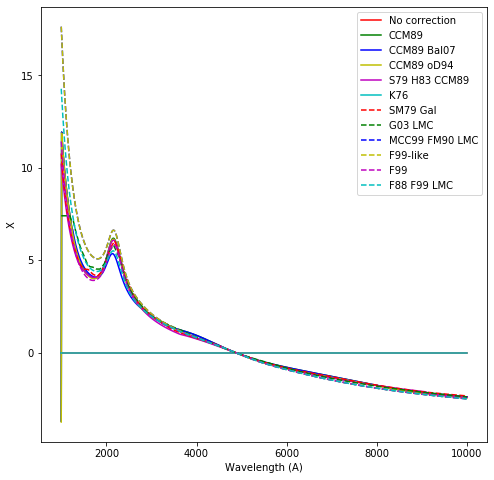

In [14]:
f, ax = plt.subplots(figsize=(8,8))
RC.plot(w_inf=1000.0, w_sup=10000.0, laws = 'all', ax=ax)